# Impacts of tornadoes and floods

## Synopsis

This report downloads data from NOAA Storm Database and performs a statistical analysis on the impact of physical events to population health and economy.

Examining the event types, we observe that most of the physical phenomena cause injuries to people, which sometimes are fatal. By far, Tornadoes are the most dangerous events, caused ~100.000 injuries on the last 60 years.

When analysing the event types by the impact on the economy, we observe that floods caused $15 billions damages on the last 60 years, mostly on properties.

## Data Processing

### Load

How the data were loaded into R ?

Data are downloaded and imported in `stormdata` data frame.

In [1]:
if(!file.exists("./data/tempdata.csv.bz2")) {
    fileUrl <- "https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2"
    download.file(fileUrl, destfile = "./data/tempdata.csv.bz2", method = "curl")
}
stormdata <- read.csv("./data/tempdata.csv.bz2")

### Process ###

How the data are processed for analysis.

To calculate the injuries to humans, `damages` dataframe is being used, to aggregate both fatal and non-fatal injuries.

The economic impact is assessed by calculating the exponential value of the property and corp damage in data frame `economic`.

Two small data frames `dam` and `eco` are used to calculate only the top 10 events in human and economic impact respectively.

In [6]:
library(Hmisc)
library(reshape)
library(ggplot2)
library(car)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



In [8]:
dim(stormdata)

[1] 902297     37

In [16]:
head(stormdata[ ,1:11], 3)
head(stormdata[,12:22], 3)
head(stormdata[,23:32], 3)
head(stormdata[,33:37], 3)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI
1,1,4/18/1950 0:00:00,0130,CST,97,MOBILE,AL,TORNADO,0,,
2,1,4/18/1950 0:00:00,0145,CST,3,BALDWIN,AL,TORNADO,0,,
3,1,2/20/1951 0:00:00,1600,CST,57,FAYETTE,AL,TORNADO,0,,


,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG
1,,,0,NA,0,,,14,100,3,0
2,,,0,NA,0,,,2,150,2,0
3,,,0,NA,0,,,0.1,123,2,0


,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE
1,0,15,25,K,0,,,,,3040
2,0,0,2.5,K,0,,,,,3042
3,0,2,25,K,0,,,,,3340


,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
1,8812,3051,8806,,1
2,8755,0,0,,2
3,8742,0,0,,3


In [21]:
Hmisc::capitalize(tolower("MARINE STRONG WIND"))

[1] "Marine strong wind"

In [22]:
stormdata$EVTYPE <- Hmisc::capitalize(tolower(stormdata$EVTYPE))

In [9]:
?aggregate

In [24]:
damages <- aggregate(cbind(FATALITIES, INJURIES) ~ EVTYPE, stormdata, sum); head(damages)

,EVTYPE,FATALITIES,INJURIES
1,high surf advisory,0,0
2,coastal flood,0,0
3,flash flood,0,0
4,lightning,0,0
5,tstm wind,0,0
6,tstm wind (g45),0,0


In [25]:
head(damages[order(-damages$FATALITIES, -damages$INJURIES), ], 10)

,EVTYPE,FATALITIES,INJURIES
758,Tornado,5633,91346
116,Excessive heat,1903,6525
138,Flash flood,978,1777
243,Heat,937,2100
418,Lightning,816,5230
779,Tstm wind,504,6957
154,Flood,470,6789
524,Rip current,368,232
320,High wind,248,1137
19,Avalanche,224,170


In [26]:
dam <- melt(head(damages[order(-damages$FATALITIES, -damages$INJURIES), ], 10));dam

Using EVTYPE as id variables


,EVTYPE,variable,value
1,Tornado,FATALITIES,5633
2,Excessive heat,FATALITIES,1903
3,Flash flood,FATALITIES,978
4,Heat,FATALITIES,937
5,Lightning,FATALITIES,816
6,Tstm wind,FATALITIES,504
7,Flood,FATALITIES,470
8,Rip current,FATALITIES,368
9,High wind,FATALITIES,248
10,Avalanche,FATALITIES,224


In [29]:
stormdata$PROPDMG <- stormdata$PROPDMG * as.numeric(Recode(stormdata$PROPDMGEXP, 
    "'0'=1;'1'=10;'2'=100;'3'=1000;'4'=10000;'5'=100000;'6'=1000000;'7'=10000000;'8'=100000000;'B'=1000000000;'h'=100;'H'=100;'K'=1000;'m'=1000000;'M'=1000000;'-'=0;'?'=0;'+'=0", 
    as.factor.result = FALSE)); head(stormdata$PROPDMG)

[1] 2.5e+07 2.5e+06 2.5e+07 2.5e+06 2.5e+06 2.5e+06

In [30]:
stormdata$CROPDMG <- stormdata$CROPDMG * as.numeric(Recode(stormdata$CROPDMGEXP, 
    "'0'=1;'2'=100;'B'=1000000000;'k'=1000;'K'=1000;'m'=1000000;'M'=1000000;''=0;'?'=0", 
    as.factor.result = FALSE)); head(stormdata$CROPDMG)

[1] 0 0 0 0 0 0

In [31]:
economic <- aggregate(cbind(PROPDMG, CROPDMG) ~ EVTYPE, stormdata, sum); head(economic)
eco <- melt(head(economic[order(-economic$PROPDMG, -economic$CROPDMG), ], 10)); head(eco)

,EVTYPE,PROPDMG,CROPDMG
1,high surf advisory,2e+08,0
2,flash flood,5e+07,0
3,tstm wind,8.0001e+12,0
4,tstm wind (g45),8e+06,0
5,?,5e+06,0
6,Apache county,5e+06,0


Using EVTYPE as id variables


,EVTYPE,variable,value
1,Flood,PROPDMG,1.225213e+20
2,Hurricane/typhoon,PROPDMG,6.55038e+19
3,Storm surge,PROPDMG,4.256074e+19
4,Hurricane,PROPDMG,5.706159e+18
5,Tornado,PROPDMG,5.348478e+18
6,Tropical storm,PROPDMG,5.152508e+18


## Results ##

### Human casualties ###

* Question: Across the United States, which types of events (as indicated in the EVTYPE variable) are most harmful with respect to population health?

By using the ggplot2 library we present a combined flipped barplot graph of the fatal (Deaths) and non-fatal Injuries, by event type.

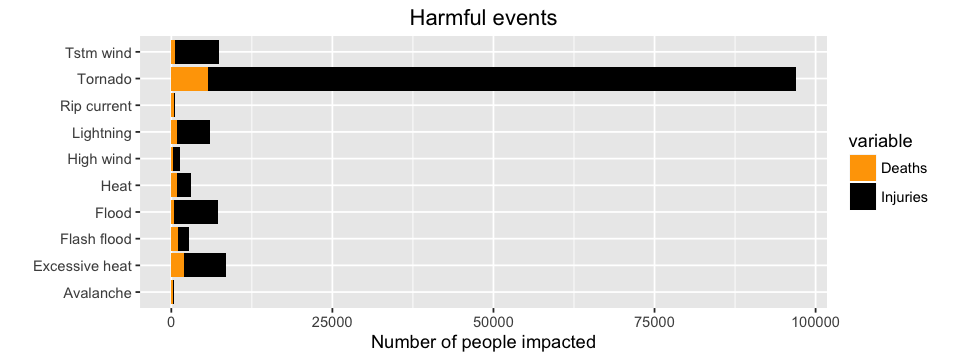

In [41]:
options(jupyter.plot_mimetypes = "image/png") 
#options(jupyter.plot_mimetypes = "image/svg+xml")
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(dam, aes(x = EVTYPE, y = value, fill = variable)) + geom_bar(stat = "identity") + 
    coord_flip() + ggtitle("Harmful events") + labs(x = "", y = "Number of people impacted") + 
    scale_fill_manual(values = c("orange", "black"), labels = c("Deaths", "Injuries"))

### Economic impact ###

* Question: Across the United States, which types of events have the greatest economic consequences?

By using the ggplot2 library we present a combined flipped barplot graph of the property and corp damages, by event type.

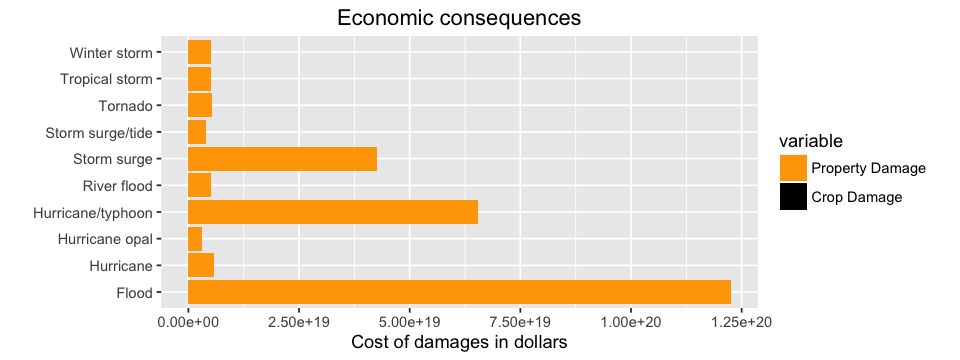

In [48]:
options(jupyter.plot_mimetypes = "image/png") 
#options(jupyter.plot_mimetypes = "image/svg+xml")
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(eco, aes(x = EVTYPE, y = value, fill = variable)) + geom_bar(stat = "identity") + 
    coord_flip() + ggtitle("Economic consequences") + labs(x = "", y = "Cost of damages in dollars") + 
    scale_fill_manual(values = c("orange", "black"), labels = c("Property Damage", "Crop Damage"))